# 1. Downloading, Installing and Starting Python SciPy
Get the Python and SciPy platform installed on your system if it is not already.

I do not want to cover this in great detail, because others already have. This is already pretty straightforward, especially if you are a developer. If you do need help, ask a question in the comments.

### 1.1 Install SciPy Libraries
This tutorial assumes Python version 2.7 or 3.6+.

There are 5 key libraries that you will need to install. Below is a list of the Python SciPy libraries required for this tutorial:

* scipy
* numpy
* matplotlib
* pandas
* sklearn <br>

There are many ways to install these libraries. My best advice is to pick one method then be consistent in installing each library.

The scipy installation page provides excellent instructions for installing the above libraries on multiple different platforms, such as Linux, mac OS X and Windows. If you have any doubts or questions, refer to this guide, it has been followed by thousands of people.

* On Mac OS X, you can use macports to install Python 3.6 and these libraries. For more information on macports, see the homepage.
* On Linux you can use your package manager, such as yum on Fedora to install RPMs.

If you are on Windows or you are not confident, I would recommend installing the free version of Anaconda that includes everything you need.

**Note:** This tutorial assumes you have scikit-learn version 0.20 or higher installed.

## 1.2 Start Python and Check Versions
It is a good idea to make sure your Python environment was installed successfully and is working as expected.

The script below will help you test out your environment. It imports each library required in this tutorial and prints the version.

Open a command line and start the python interpreter:

In [59]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:58:50) 
[GCC 10.3.0]
scipy: 1.8.1
numpy: 1.23.0
matplotlib: 3.5.2
pandas: 1.4.3
sklearn: 1.1.1


## 2. Load The Data
We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

### 2.1 Import libraries
First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [60]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [61]:
# Load dataset
url = "iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = read_csv(url, names=names)
dataset = read_csv(url)

In [62]:
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [63]:
# shape
print(dataset.shape)

(150, 5)


In [64]:
# head
print(dataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width    name
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [65]:
# descriptions
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [66]:
# class description
print(dataset.groupby('name').size())

name
setosa        50
versicolor    50
virginica     50
dtype: int64


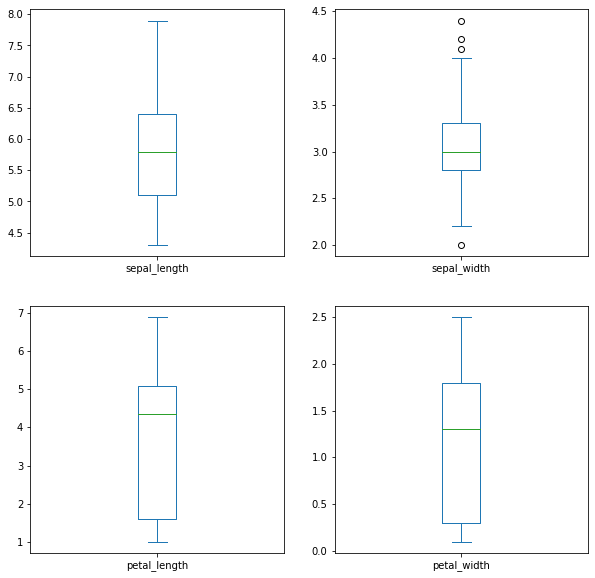

In [67]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, figsize=(10,10), layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Referencing the kde plot: Sepal width is the least infomrative because it has such a uniform distribution around the mean

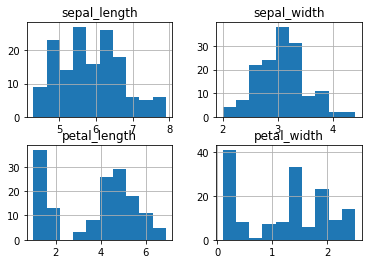

In [68]:
dataset.hist()
pyplot.show()

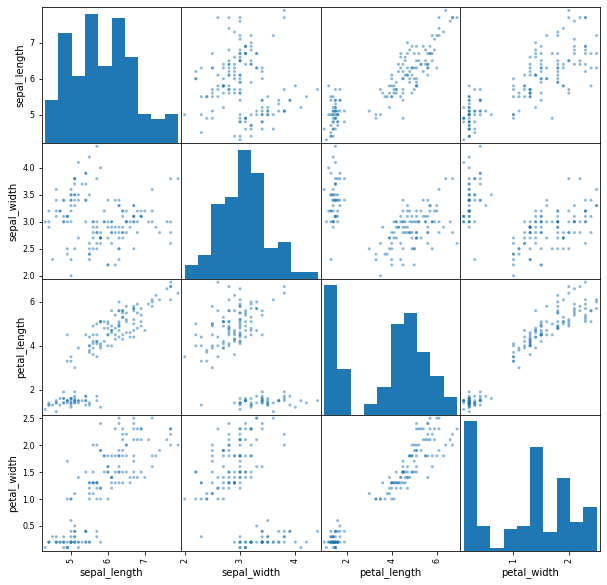

In [69]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(10,10))
pyplot.show()

Seperation is occuring on the multivariate scale. Machine learning is able to look a 4 dimensions but all of these are looking at two demensions. 

In [70]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [71]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

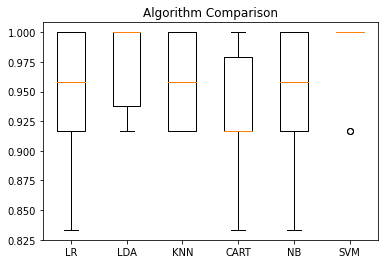

In [72]:
...
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

## 6. Make Predictions
We must choose an algorithm to use to make predictions.

The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

### 6.1 Make predictions
We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [73]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

### 6.2 Evaluate Predictions
We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [74]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).